# Interpolation Using Numerical Methods

## Methods:
- Newton Interpolation (Divided Differences)
- Lagrange Interpolation
- Cubic Spline Interpolation

## Dataset:
Population data for a major city (1990–2015)

## Given Data

The following population data for a major city is provided:

- **Independent variable**: Year
- **Dependent variable**: Population

| Year | Population |
|-----|-----------|
| 1990 | 2,450,800 |
| 1995 | 2,710,500 |
| 2000 | 2,890,200 |
| 2005 | 3,150,700 |
| 2010 | 3,420,300 |
| 2015 | 3,810,600 |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given data (census years and population)

t = np.array([1990, 1995, 2000, 2005, 2010, 2015])
y = np.array([2450800, 2710500, 2890200, 3150700, 3420300, 3810600])

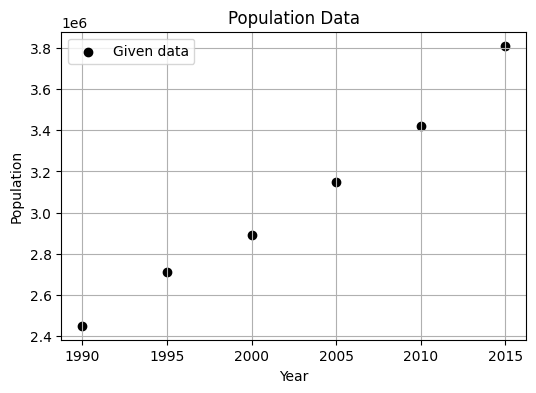

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Data")
plt.grid(True)
plt.legend()
plt.show()

## Newton Interpolation (Divided Differences)

This method constructs an interpolating polynomial using divided differences.
The resulting polynomial passes exactly through all given data points.

In [4]:
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

In [5]:
def newton_polynomial(x_data, diff_table, x):
    n = len(x_data)
    result = diff_table[0, 0]
    product = 1.0

    for i in range(1, n):
        product *= (x - x_data[i - 1])
        result += diff_table[0, i] * product

    return result

In [6]:
diff_table = divided_differences(t, y)

t_smooth = np.linspace(t.min(), t.max(), 300)
y_newton = np.array([newton_polynomial(t, diff_table, ti) for ti in t_smooth])

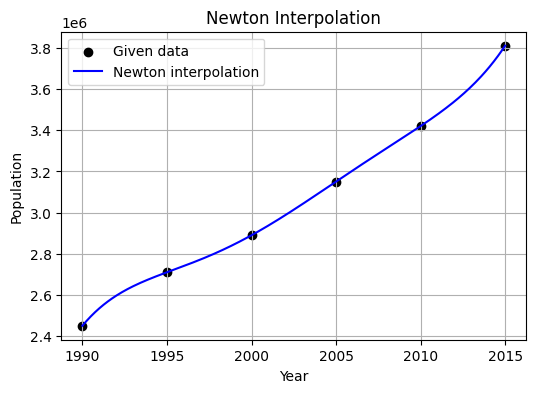

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.plot(t_smooth, y_newton, color="blue", label="Newton interpolation")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Newton Interpolation")
plt.grid(True)
plt.legend()
plt.show()

## Polynomial Interpolation (Degree 5)

A polynomial of degree 5 is constructed to pass exactly through all data points.
This polynomial is equivalent to the Newton and Lagrange interpolating polynomials.

In [8]:
coeff_poly = np.polyfit(t, y, 5)

# Create polynomial function
poly_func = np.poly1d(coeff_poly)

print("Interpolating polynomial (degree 5):")
print(poly_func)

Interpolating polynomial (degree 5):
       5            4             3             2
1.109 x - 1.11e+04 x + 4.448e+07 x - 8.908e+10 x + 8.92e+13 x - 3.573e+16


In [9]:
y_poly = poly_func(t_smooth)

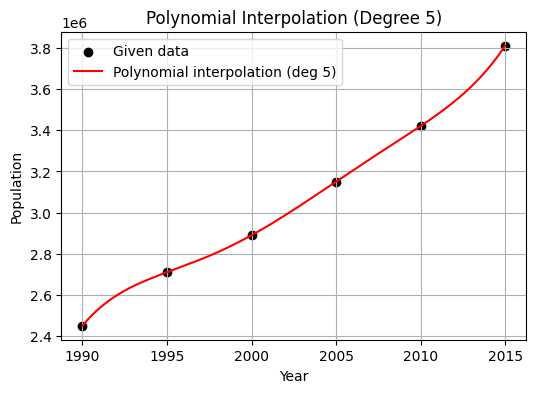

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.plot(t_smooth, y_poly, color="red", label="Polynomial interpolation (deg 5)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Polynomial Interpolation (Degree 5)")
plt.grid(True)
plt.legend()
plt.show()

## Cubic Spline Interpolation

Cubic spline interpolation constructs a smooth curve composed of piecewise
cubic polynomials that pass exactly through all data points.
The spline ensures continuity of the first and second derivatives.

In [11]:
from scipy.interpolate import CubicSpline

In [12]:
# Cubic spline interpolation
cs = CubicSpline(t, y)

# Smooth x values
t_smooth = np.linspace(t.min(), t.max(), 300)

# Evaluate spline
y_spline = cs(t_smooth)

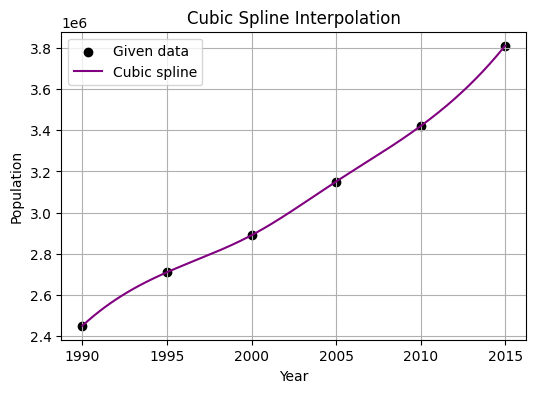

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.plot(t_smooth, y_spline, color="purple", label="Cubic spline")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Cubic Spline Interpolation")
plt.grid(True)
plt.legend()
plt.show()

## Verification of Interpolating Polynomials

To verify the numerical solution, we compare the Newton interpolating polynomial
with the degree-5 polynomial obtained using `numpy.polyfit`.

Since both methods construct a unique interpolating polynomial that passes
exactly through all given data points, their results should coincide.

In [14]:
# Compare Newton and polynomial interpolation
difference = np.max(np.abs(y_newton - y_poly))

print("Maximum absolute difference between Newton and Polynomial interpolation:")
print(difference)

Maximum absolute difference between Newton and Polynomial interpolation:
99.48982361564413


## Estimation of Population Between 1990 and 2015

Using the interpolating polynomial, we estimate the population values
for intermediate years between 1990 and 2015.

In [15]:
# Estimate population for each year between 1990 and 2015
years_est = np.arange(1990, 2016)
pop_est_poly = poly_func(years_est)

for yr, pop in zip(years_est, pop_est_poly):
    print(f"Year {yr}: Estimated population = {int(pop)}")

Year 1990: Estimated population = 2450828
Year 1991: Estimated population = 2535284
Year 1992: Estimated population = 2596688
Year 1993: Estimated population = 2642584
Year 1994: Estimated population = 2678924
Year 1995: Estimated population = 2710532
Year 1996: Estimated population = 2741036
Year 1997: Estimated population = 2772980
Year 1998: Estimated population = 2808044
Year 1999: Estimated population = 2847028
Year 2000: Estimated population = 2890256
Year 2001: Estimated population = 2937440
Year 2002: Estimated population = 2988016
Year 2003: Estimated population = 3041080
Year 2004: Estimated population = 3095652
Year 2005: Estimated population = 3150740
Year 2006: Estimated population = 3205644
Year 2007: Estimated population = 3259780
Year 2008: Estimated population = 3313192
Year 2009: Estimated population = 3366336
Year 2010: Estimated population = 3420316
Year 2011: Estimated population = 3477224
Year 2012: Estimated population = 3540024
Year 2013: Estimated population = 

## Population Prediction for 2018 and 2025

The interpolating polynomial is used to predict the population
outside the given data range.

In [16]:
years_pred = np.array([2018, 2025])

poly_pred = poly_func(years_pred)
spline_pred = cs(years_pred)

for i, year in enumerate(years_pred):
    print(f"Year {year}:")
    print(f"  Polynomial prediction: {int(poly_pred[i])}")
    print(f"  Cubic spline prediction: {int(spline_pred[i])}")

Year 2018:
  Polynomial prediction: 4361120
  Cubic spline prediction: 4175923
Year 2025:
  Polynomial prediction: 8811656
  Cubic spline prediction: 5657220


## Comparison of Polynomial and Cubic Spline Interpolation

Both interpolation methods pass exactly through the given data points.
However, their behavior differs between and outside the data range.

- The polynomial interpolation may exhibit oscillatory behavior,
  especially near the boundaries.
- The cubic spline interpolation provides a smoother curve with
  continuous first and second derivatives.

Overall, cubic spline interpolation is more stable and realistic
for modeling population growth.

## Effect of Using Integer-Scaled Data

To investigate numerical stability, we rescale the data:
- Years are measured as years since 1990
- Population is measured in millions

In [17]:
# Integer-scaled data
t_int = np.array([0, 5, 10, 15, 20, 25])
y_int = np.array([2.4508, 2.7105, 2.8902, 3.1507, 3.4203, 3.8106])

coeff_poly_int = np.polyfit(t_int, y_int, 5)
poly_int = np.poly1d(coeff_poly_int)

print("Polynomial with integer-scaled data:")
print(poly_int)

Polynomial with integer-scaled data:
           5             4           3           2
1.109e-06 x - 7.094e-05 x + 0.00165 x - 0.01601 x + 0.09892 x + 2.451


Rescaling the variables improves numerical stability and results
in smaller polynomial coefficients while preserving the shape
of the interpolating curve.

## Effect of Integer Scaling on Interpolation Results

In [18]:
# Scale variables
t_scaled = np.array([0, 5, 10, 15, 20, 25])          # years since 1990
y_scaled = np.array([2.4508, 2.7105, 2.8902,
                     3.1507, 3.4203, 3.8106])       # population in millions

# Polynomial interpolation on scaled data
coeff_scaled = np.polyfit(t_scaled, y_scaled, 5)
poly_scaled = np.poly1d(coeff_scaled)

print("Interpolating polynomial with scaled variables:")
print(poly_scaled)

Interpolating polynomial with scaled variables:
           5             4           3           2
1.109e-06 x - 7.094e-05 x + 0.00165 x - 0.01601 x + 0.09892 x + 2.451


Using scaled variables significantly reduces the magnitude of coefficients,
improves numerical stability, and makes the interpolating polynomial easier
to interpret. This scaling is especially important in numerical methods
to avoid round-off errors and ill-conditioned computations.